=== Maxwell–Boltzmann tail integral: convergence study ===

v_min ≈ 4.424×10⁴ m/s
v_mp  ≈ 1.286×10⁴ m/s

Part (b): using v_max = 7.0 v_mp ≈ 9.001×10⁴ m/s, h ≈ 9.998e+00 m/s, N = 4578
Tail fraction F(v ≥ v_min) ≈ 2.9227930183e-05

Convergence vs step size h (fixed v_max = 7 v_mp):
  h_target =  1.000e+03  h_eff =  9.950e+02  N =      46  F ≈ 2.9228430717e-05
  h_target =  5.179e+02  h_eff =  5.143e+02  N =      89  F ≈ 2.9227966013e-05
  h_target =  2.683e+02  h_eff =  2.677e+02  N =     171  F ≈ 2.9227932815e-05
  h_target =  1.389e+02  h_eff =  1.387e+02  N =     330  F ≈ 2.9227930373e-05
  h_target =  7.197e+01  h_eff =  7.197e+01  N =     636  F ≈ 2.9227930197e-05
  h_target =  3.728e+01  h_eff =  3.727e+01  N =    1228  F ≈ 2.9227930184e-05
  h_target =  1.931e+01  h_eff =  1.930e+01  N =    2371  F ≈ 2.9227930183e-05
  h_target =  1.000e+01  h_eff =  9.998e+00  N =    4578  F ≈ 2.9227930183e-05
  h_target =  5.179e+00  h_eff =  5.179e+00  N =    8838  F ≈ 2.9227930183e-05
  h_targ

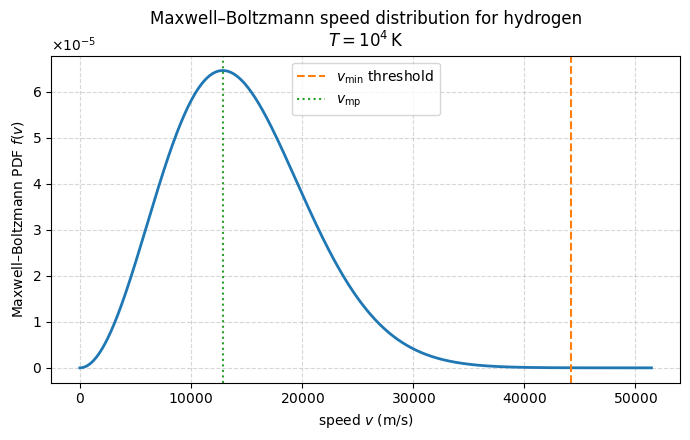

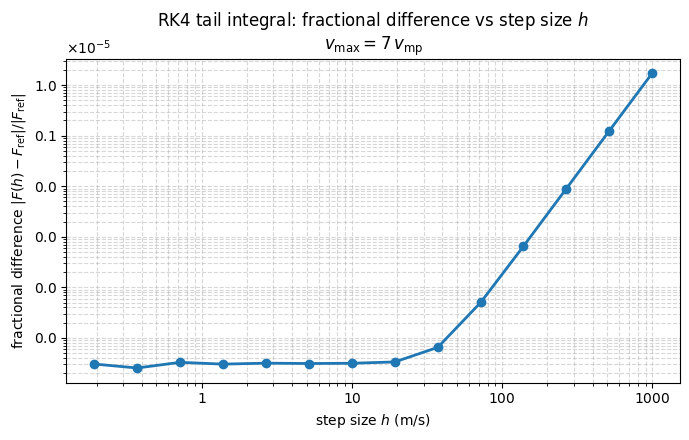

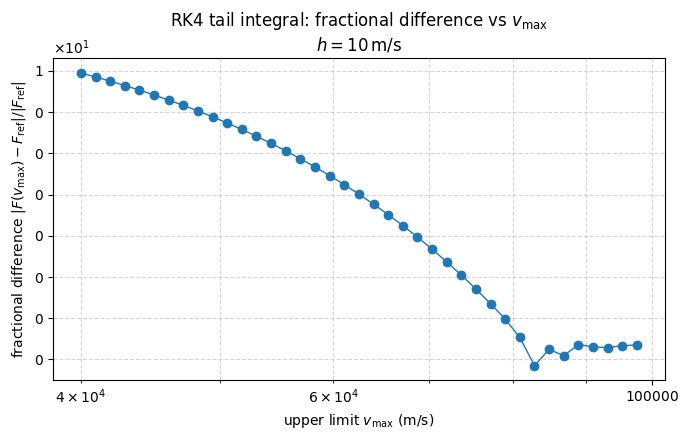

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import ScalarFormatter

# =========================================================
# PHYSICAL CONSTANTS
# =========================================================
k_B = 1.380649e-23          # J/K
T   = 1.0e4                 # K
m_H = 1.67e-27              # kg
eV_to_J = 1.602176634e-19   # J

# ---------- HYDROGEN LEVELS ----------
def E_n_eV(n):
    return -13.6 / n**2

E1_eV = E_n_eV(1)
E2_eV = E_n_eV(2)
DeltaE_eV = E2_eV - E1_eV
DeltaE_J  = DeltaE_eV * eV_to_J

v_min = np.sqrt(2 * DeltaE_J / m_H)   # threshold speed

# =========================================================
# MAXWELL–BOLTZMANN SPEED PDF
# =========================================================
def f_MB(v):
    prefactor = (m_H / (2 * np.pi * k_B * T)) ** 1.5
    return 4 * np.pi * prefactor * v**2 * np.exp(-m_H * v**2 / (2 * k_B * T))

# =========================================================
# RK4 INTEGRATION IN v
# =========================================================
def integrate_rk4_v(func, a, b, n):
    h = (b - a)/n
    I = 0.0
    v = a
    for _ in range(n):
        k1 = func(v)
        k2 = func(v + 0.5*h)
        k3 = func(v + 0.5*h)
        k4 = func(v + h)
        I += (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        v += h
    return I, h

# ---------- helper for 10ⁿ notation ----------
_sup_map = str.maketrans("0123456789-", "⁰¹²³⁴⁵⁶⁷⁸⁹⁻")
def sci_uni(x, digits=3):
    if x == 0:
        return f"{0:.{digits}f}"
    expo = int(np.floor(np.log10(abs(x))))
    mant = x / 10**expo
    exp_str = str(expo).translate(_sup_map)
    return f"{mant:.{digits}f}×10{exp_str}"

print("=== Maxwell–Boltzmann tail integral: convergence study ===\n")

# =========================================================
# CHARACTERISTIC SPEEDS
# =========================================================
v_mp   = np.sqrt(2 * k_B * T / m_H)
v_mean = np.sqrt(8 * k_B * T / (np.pi * m_H))
v_rms  = np.sqrt(3 * k_B * T / m_H)

print(f"v_min ≈ {sci_uni(v_min)} m/s")
print(f"v_mp  ≈ {sci_uni(v_mp)} m/s\n")

# convenience function to apply scientific ScalarFormatter
def set_sci_formatter(ax):
    fmt = ScalarFormatter(useMathText=True)
    fmt.set_powerlimits((0, 0))   # always scientific notation
    ax.xaxis.set_major_formatter(fmt)
    ax.yaxis.set_major_formatter(fmt)

# =========================================================
# PLOT 0: Maxwell–Boltzmann speed distribution
# =========================================================
v_plot = np.linspace(0.0, 4.0*v_mp, 500)
f_plot = f_MB(v_plot)

fig0, ax0 = plt.subplots(figsize=(7,4.5))
ax0.plot(v_plot, f_plot, lw=2)
ax0.axvline(v_min, color="C1", ls="--", label=r"$v_{\min}$ threshold")
ax0.axvline(v_mp,  color="C2", ls=":",  label=r"$v_{\mathrm{mp}}$")
ax0.set_xlabel(r"speed $v$ (m/s)")
ax0.set_ylabel(r"Maxwell–Boltzmann PDF $f(v)$")
ax0.set_title(r"Maxwell–Boltzmann speed distribution for hydrogen" "\n"
              r"$T = 10^4\,\mathrm{K}$")
ax0.grid(True, ls="--", alpha=0.5)
ax0.legend()
set_sci_formatter(ax0)
fig0.tight_layout()

# =========================================================
# PART (b): tail fraction for a good (h, v_max) using RK4
# =========================================================
alpha_b = 7.0
v_max_b = alpha_b * v_mp
h_b     = 10.0  # reasonably small
L_b     = v_max_b - v_min
N_b     = int(np.ceil(L_b / h_b))
F_b, h_eff_b = integrate_rk4_v(f_MB, v_min, v_max_b, N_b)

print(f"Part (b): using v_max = {alpha_b:.1f} v_mp ≈ {sci_uni(v_max_b)} m/s, "
      f"h ≈ {h_eff_b:.3e} m/s, N = {N_b}")
print(f"Tail fraction F(v ≥ v_min) ≈ {F_b:.10e}\n")

# =========================================================
# PART (c) – STUDY 1: convergence vs step size h (RK4)
# =========================================================
alpha_vmax = 7.0
v_max = alpha_vmax * v_mp
L = v_max - v_min

# step sizes 1000 -> 0.1 (log spaced)
h_list = np.logspace(3, -1, num=15)
F_h_list = []
h_eff_list = []

print("Convergence vs step size h (fixed v_max = 7 v_mp):")
for h_target in h_list:
    N = int(np.ceil(L / h_target))
    if N < 1:
        N = 1
    F_val, h_eff = integrate_rk4_v(f_MB, v_min, v_max, N)
    F_h_list.append(F_val)
    h_eff_list.append(h_eff)
    print(f"  h_target = {h_target:10.3e}  h_eff = {h_eff:10.3e}  "
          f"N = {N:7d}  F ≈ {F_val:.10e}")

F_h_list   = np.array(F_h_list)
h_eff_list = np.array(h_eff_list)

F_ref_h = F_h_list[-1]   # smallest h as reference
frac_diff_h = np.abs(F_h_list - F_ref_h) / np.abs(F_ref_h)

print(f"\nReference (smallest h): h_ref ≈ {h_eff_list[-1]:.3e} m/s, "
      f"F_ref_h ≈ {F_ref_h:.10e}\n")

# PLOT 1: fractional difference vs h
fig1, ax1 = plt.subplots(figsize=(7,4.5))
ax1.plot(h_eff_list[:-1], frac_diff_h[:-1], "o-", lw=2)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"step size $h$ (m/s)")
ax1.set_ylabel(r"fractional difference $|F(h) - F_{\mathrm{ref}}| / |F_{\mathrm{ref}}|$")
ax1.set_title(r"RK4 tail integral: fractional difference vs step size $h$" "\n"
              r"$v_{\max} = 7\,v_{\mathrm{mp}}$")
ax1.grid(True, which="both", ls="--", alpha=0.5)
set_sci_formatter(ax1)
fig1.tight_layout()

# =========================================================
# PART (c) – STUDY 2: convergence vs v_max at fixed h (RK4)
# =========================================================
h_fixed = 10.0  # m/s

vmax_list = np.logspace(np.log10(4.0e4), np.log10(1.0e5), 40)

F_vmax_list = []
for v_max2 in vmax_list:
    L2 = v_max2 - v_min
    N2 = int(np.ceil(L2 / h_fixed))
    if N2 < 1:
        N2 = 1
    F_val2, h_eff2 = integrate_rk4_v(f_MB, v_min, v_max2, N2)
    F_vmax_list.append(F_val2)

F_vmax_list = np.array(F_vmax_list)
F_ref_v = F_vmax_list[-1]
frac_diff_v = np.abs(F_vmax_list - F_ref_v) / np.abs(F_ref_v)

print("Convergence vs v_max (fixed h = 10 m/s):")
print(f"Reference: v_max_ref ≈ {sci_uni(vmax_list[-1])} m/s, "
      f"F_ref_v ≈ {F_ref_v:.10e}\n")

# PLOT 2: fractional difference vs v_max (drop last point)
fig2, ax2 = plt.subplots(figsize=(7,4.5))
ax2.plot(vmax_list[:-1], frac_diff_v[:-1], "o-", lw=1)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlabel(r"upper limit $v_{\max}$ (m/s)")
ax2.set_ylabel(r"fractional difference $|F(v_{\max}) - F_{\mathrm{ref}}| / |F_{\mathrm{ref}}|$")
ax2.set_title(r"RK4 tail integral: fractional difference vs $v_{\max}$"
              "\n" r"$h = 10\,\mathrm{m/s}$")
ax2.grid(True, which="both", ls="--", alpha=0.5)
set_sci_formatter(ax2)
fig2.tight_layout()

# =========================================================
# SIGNIFICANT DIGITS ESTIMATE
# =========================================================
floor_h = np.min(frac_diff_h[:-1])
floor_v = np.min(frac_diff_v[:-1])
err_floor = max(floor_h, floor_v)

if err_floor == 0:
    sig_digits = 15   # double precision cap
else:
    sig_digits = max(0, int(-math.log10(err_floor)))

print("=== Estimated numerical precision (part c) ===")
print(f"Minimum fractional difference vs h     ≈ {floor_h:.3e}")
print(f"Minimum fractional difference vs v_max ≈ {floor_v:.3e}")
print(f"Conservative error floor               ≈ {err_floor:.3e}")
print(f"→ You can safely trust about {sig_digits} significant digits "
      "in the tail fraction F; digits beyond this are not reliable.\n")

plt.show()
